In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score,root_mean_squared_error
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv("Delivery_amazon.csv")

In [3]:
df.columns

Index(['Unnamed: 0', 'Order_ID', 'Agent_Age', 'Agent_Rating', 'Store_Latitude',
       'Store_Longitude', 'Drop_Latitude', 'Drop_Longitude', 'Order_Date',
       'Order_Time', 'Pickup_Time', 'Weather', 'Traffic', 'Vehicle', 'Area',
       'Delivery_Time', 'Category', 'distance'],
      dtype='object')

In [4]:
df=df.drop(['Store_Latitude','Store_Longitude', 'Drop_Latitude', 'Drop_Longitude'],axis=1)

In [5]:
df=df.drop(['Order_Date', 'Order_Time',
       'Pickup_Time'],axis=1)

In [6]:
df=df.loc[:,~df.columns.str.contains('^Unnamed')]

In [7]:
df.columns

Index(['Order_ID', 'Agent_Age', 'Agent_Rating', 'Weather', 'Traffic',
       'Vehicle', 'Area', 'Delivery_Time', 'Category', 'distance'],
      dtype='object')

In [8]:
df_num=df.select_dtypes(include=np.number)

In [9]:
df_num

,Agent_Age,Agent_Rating,Delivery_Time,distance
0,37,4.9,120,2.288918
1,34,4.5,165,14.777225
2,23,4.4,130,1.136966
3,38,4.7,105,5.698649
4,32,4.6,150,4.510871
...,...,...,...,...
43589,30,4.8,160,1.144920
43590,21,4.6,180,11.007735
43591,30,4.9,80,3.383273
43592,20,4.7,130,4.558840


In [10]:
df_num.head()

,Agent_Age,Agent_Rating,Delivery_Time,distance
0,37,4.9,120,2.288918
1,34,4.5,165,14.777225
2,23,4.4,130,1.136966
3,38,4.7,105,5.698649
4,32,4.6,150,4.510871


In [11]:
df_num.isnull().sum()

Agent_Age        0
Agent_Rating     0
Delivery_Time    0
distance         0
dtype: int64

In [12]:
df_num.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43594 entries, 0 to 43593
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Agent_Age      43594 non-null  int64  
 1   Agent_Rating   43594 non-null  float64
 2   Delivery_Time  43594 non-null  int64  
 3   distance       43594 non-null  float64
dtypes: float64(2), int64(2)
memory usage: 1.3 MB


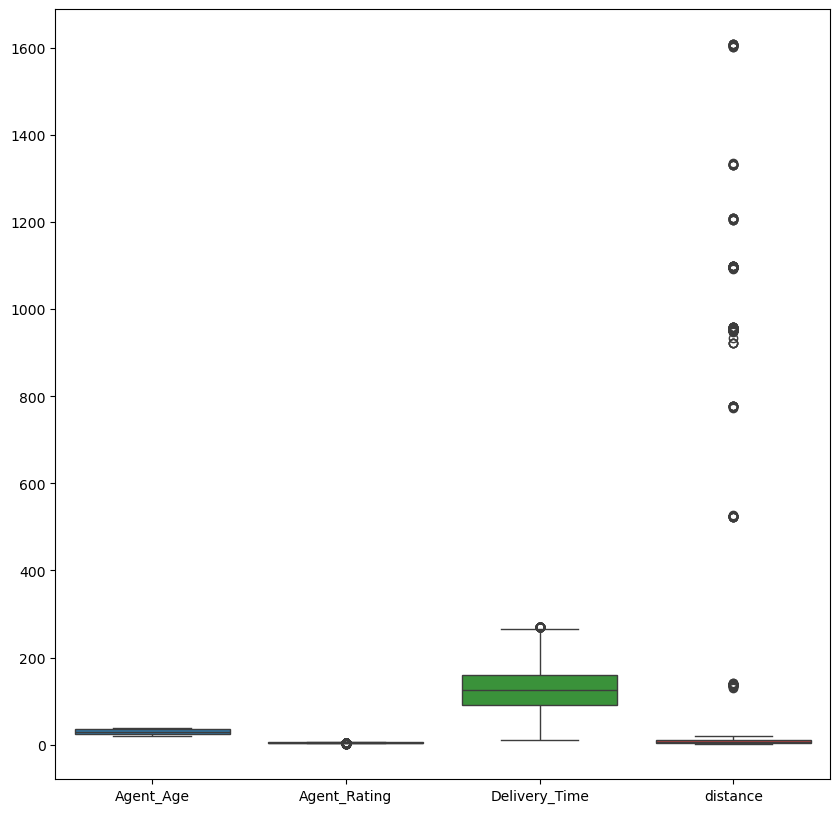

In [13]:
#outliers
plt.figure(figsize=(10,10))
sns.boxplot(data=df_num)
plt.show()

In [14]:
df_num.describe()


,Agent_Age,Agent_Rating,Delivery_Time,distance
count,43594.000000,43594.000000,43594.000000,43594.000000
mean,29.555719,4.635287,124.916433,10.482826
std,5.760689,0.313827,51.941975,56.968917
min,20.000000,2.500000,10.000000,1.112362
25%,25.000000,4.500000,90.000000,3.476716
50%,30.000000,4.700000,125.000000,6.922090
75%,35.000000,4.900000,160.000000,10.298844
max,39.000000,5.000000,270.000000,1608.177974


In [15]:
df_num.shape

(43594, 4)

In [16]:
df_num

,Agent_Age,Agent_Rating,Delivery_Time,distance
0,37,4.9,120,2.288918
1,34,4.5,165,14.777225
2,23,4.4,130,1.136966
3,38,4.7,105,5.698649
4,32,4.6,150,4.510871
...,...,...,...,...
43589,30,4.8,160,1.144920
43590,21,4.6,180,11.007735
43591,30,4.9,80,3.383273
43592,20,4.7,130,4.558840


In [17]:
df_num.columns

Index(['Agent_Age', 'Agent_Rating', 'Delivery_Time', 'distance'], dtype='object')

In [18]:
X=df_num.drop(columns=['Delivery_Time'])
y=df[['Delivery_Time']]

In [19]:
X

,Agent_Age,Agent_Rating,distance
0,37,4.9,2.288918
1,34,4.5,14.777225
2,23,4.4,1.136966
3,38,4.7,5.698649
4,32,4.6,4.510871
...,...,...,...
43589,30,4.8,1.144920
43590,21,4.6,11.007735
43591,30,4.9,3.383273
43592,20,4.7,4.558840


In [20]:
#scaling
scaler=StandardScaler()
X = scaler.fit_transform(X)

In [21]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [22]:
rf_model=RandomForestRegressor()

In [23]:
rf_model.fit(X_train,y_train)

RandomForestRegressor()

In [24]:
#Evaluation
y_pred=rf_model.predict(X_test)

In [25]:
mae=mean_absolute_error(y_test,y_pred)
mse=mean_squared_error(y_test,y_pred)
rmse=root_mean_squared_error(y_test,y_pred)
r2 = r2_score(y_test,y_pred)

In [26]:
y_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8719 entries, 3885 to 20867
Data columns (total 1 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Delivery_Time  8719 non-null   int64
dtypes: int64(1)
memory usage: 136.2 KB


In [34]:
mae

36.94450403168851

In [36]:
mse

2364.4770743127774

In [38]:
r2

0.10089809508195313

In [40]:
rmse

48.625888930823436

In [46]:
import mlflow
import mlflow.sklearn
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Set MLflow experiment and tracking URI
mlflow.set_experiment("Random Forest Regression")
mlflow.set_tracking_uri("http://127.0.0.1:5000/")

# Compute regression metrics
y_pred = rf_model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5  # Root Mean Squared Error

# Start MLflow run
with mlflow.start_run():
    mlflow.set_tag("Run Name","Random_Forest_Reg")
    # Log hyperparameters
    params = {
        "n_estimators": rf_model.get_params()["n_estimators"],  
        "max_depth": rf_model.get_params()["max_depth"]
    }

    mlflow.log_params(params)

    # Log regression metrics
    mlflow.log_metric('mean_square', mse)
    mlflow.log_metric('mean_absolu', mae)
    mlflow.log_metric('root_mean', rmse)

    # Log the trained model
    mlflow.sklearn.log_model(rf_model, "random_forest")

print("Model and metrics successfully logged in MLflow!")


2025/02/13 17:01:24 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run glamorous-mole-936 at: http://127.0.0.1:5000/#/experiments/624282095782204615/runs/da38a2a9fb5e42daa2185a1a1f3fea29
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/624282095782204615
Model and metrics successfully logged in MLflow!


In [ ]:
###model registry

In [48]:
model_name = "RandomForestRegressor"
run_id = "63c10b67050f4d1a839a5fa3d94340aa"

model_uri = f"runs:/{run_id}/random_forest"

model_version = mlflow.register_model(model_uri=model_uri, name=model_name)

print(f"Model '{model_name}' successfully registered as version {model_version.version}.")


Successfully registered model 'RandomForestRegressor'.
2025/02/13 17:02:16 INFO mlflow.store.model_registry.abstract_store: Waiting up to 300 seconds for model version to finish creation. Model name: RandomForestRegressor, version 1


Model 'RandomForestRegressor' successfully registered as version 1.


Created version '1' of model 'RandomForestRegressor'.


In [ ]:
model_name="RandomForestRegressor"
run_id = "63c10b67050f4d1a839a5fa3d94340aa"

model_uri = mlflow-artifacts:/624282095782204615/63c10b67050f4d1a839a5fa3d94340aa/artifacts/random_forest


with mlflow.start_run(run_id=run_id):
    mlflow.register_model(model_uri=model_uri,name=model_name)